In [18]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold8_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.176266,-0.126581,0.255971,-0.094936,-0.178978,-0.142334,0.117486,-0.208209,-0.202585,0.032798,...,-0.170082,0.055189,-0.041769,-0.083338,0.037080,-0.098732,Abnormal,P31,FP-B,AB01
1,-0.092128,-0.111465,0.229805,-0.127210,-0.173608,-0.140279,0.379899,-0.161369,-0.161904,0.088065,...,-0.178106,0.080956,0.028838,-0.052110,0.112029,-0.131931,Abnormal,P1,FP-A,AB01
2,-0.154253,-0.121431,0.176391,-0.155759,-0.177797,-0.138466,0.364843,-0.213568,-0.190205,0.140837,...,-0.194163,-0.017772,0.024317,-0.114842,0.069498,-0.073766,Abnormal,P2,FP-A,AB01
3,-0.185132,-0.133850,0.273052,-0.063366,-0.163682,-0.063715,0.185061,-0.077128,-0.200565,0.005331,...,-0.164659,0.158381,-0.075338,-0.134253,0.036917,-0.140047,Abnormal,P42,FP-B,AB01
4,-0.049047,-0.102947,0.456641,0.039560,-0.074768,-0.067078,0.402351,-0.136153,-0.167107,-0.009086,...,-0.117693,0.045899,0.044355,-0.117944,0.083893,-0.150556,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.852471,0.619833,-0.210811,0.183871,0.413822,0.279697,-0.083906,-0.021640,0.879066,-0.167181,...,0.755825,-0.198221,-0.093761,0.566742,-0.122881,0.493488,Normal,P32,FP-B,Normal
4597,0.314243,0.125983,-0.182202,0.771696,0.262492,0.364797,-0.169629,0.229504,0.178705,-0.081125,...,0.324225,-0.186114,0.005001,0.223349,-0.108289,0.200945,Normal,P42,FP-B,Normal
4598,0.544507,0.286786,-0.202114,0.683390,0.149633,0.473665,-0.068342,0.013771,0.227784,-0.152739,...,0.238670,-0.081911,0.036632,0.550923,0.022048,0.423742,Normal,P52,FP-C,Normal
4599,0.368368,0.481323,-0.207309,0.423160,0.633391,0.194087,-0.209065,0.566697,0.373197,-0.059514,...,0.284077,-0.150701,-0.122327,0.537381,-0.107550,0.956541,Normal,P61,FP-C,Normal


In [19]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(4601, 2048)
(4601,)


In [20]:
y[0]

'FP-B'

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [22]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.572056,0.033504,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.572057,0.033862,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.569232,0.034593,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.570319,0.033707,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.558799,0.035255,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.639004,0.048315,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.640526,0.049903,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.636831,0.047282,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.639875,0.045379,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.608143,0.044569,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5720564934452513

 **print the array of mean scores only 

[0.57205649 0.57205697 0.56923182 0.57031878 0.5587994  0.63900358
 0.64052579 0.63683061 0.63987456 0.60814345 0.67312789 0.67899462
 0.67160379 0.6718226  0.62879044 0.68138499 0.68007969 0.67008158
 0.67964727 0.62661841 0.68269028 0.67921013 0.67160238 0.67573375
 0.62661794]

 **examine the best model 

0.6826902763368858
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [25]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.6826902763368858


# setting parameters

In [26]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [27]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold8_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [28]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.145873,-0.145607,0.022597,-0.027057,-0.200997,-0.137499,0.040337,-0.171097,-0.207573,...,-0.168271,-0.040307,-0.008302,-0.096221,0.083172,-0.122260,Abnormal,P31,FP-B,AB01
1,1,-0.160235,-0.148496,0.138017,-0.097721,-0.192524,-0.158592,0.136529,-0.207999,-0.185892,...,-0.180010,-0.046805,0.049341,-0.112320,-0.000023,-0.088421,Abnormal,P2,FP-A,AB01
2,2,-0.154414,-0.126036,0.152981,-0.134474,-0.222772,-0.042759,0.274228,-0.077468,-0.208737,...,-0.161731,-0.070467,-0.029572,-0.135873,0.185502,-0.137310,Abnormal,P51,FP-C,AB01
3,3,-0.122253,-0.164240,0.291866,-0.138341,-0.158042,-0.132671,0.424885,-0.184487,-0.209159,...,-0.192535,-0.043425,0.225481,-0.125891,0.087897,0.018063,Abnormal,P1,FP-A,AB01
4,4,-0.068276,-0.090568,0.176315,-0.132916,-0.101672,-0.127494,0.184186,-0.205508,-0.188595,...,-0.188592,-0.050513,-0.077762,-0.041359,0.148492,-0.057217,Abnormal,P52,FP-C,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,-0.065322,-0.096514,-0.185740,0.018262,-0.105873,0.100438,-0.123069,0.066184,-0.119514,...,-0.000023,-0.113952,-0.061757,-0.120490,-0.199286,-0.045103,Normal,P71,FP-D,Normal
652,652,0.295571,0.307370,-0.139219,0.676659,0.341264,0.466379,-0.127595,1.030663,0.489739,...,0.249083,-0.172375,0.089985,0.115840,-0.089799,0.482417,Normal,P72,FP-D,Normal
653,653,0.170927,0.281547,-0.186315,0.508857,0.264922,0.381621,-0.090961,0.442370,0.262251,...,0.589979,0.003480,-0.108289,0.058855,-0.129016,0.287849,Normal,P8,FP-E,Normal
654,654,-0.033493,-0.008705,-0.183773,0.520157,0.214841,-0.208221,-0.053012,-0.036728,0.262903,...,-0.131957,0.284193,-0.023389,0.234812,-0.033792,0.405667,Normal,P1,FP-A,Normal


In [29]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(656, 2048)
(656,)


In [30]:
y_test

0      FP-B
1      FP-A
2      FP-C
3      FP-A
4      FP-C
       ... 
651    FP-D
652    FP-D
653    FP-E
654    FP-A
655    FP-A
Name: Views, Length: 656, dtype: object

In [31]:
y_pred = modelOpt.predict(X_test)

In [32]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 61  44  25   0   0]
 [ 13 176  11   1   3]
 [  7  38 133  10   0]
 [  0  14  15  71   0]
 [  1   5   0   0  28]]
              precision    recall  f1-score   support

        FP-A       0.74      0.47      0.58       130
        FP-B       0.64      0.86      0.73       204
        FP-C       0.72      0.71      0.72       188
        FP-D       0.87      0.71      0.78       100
        FP-E       0.90      0.82      0.86        34

    accuracy                           0.71       656
   macro avg       0.77      0.71      0.73       656
weighted avg       0.73      0.71      0.71       656



Text(0.5, 21.5, 'Predicted label')

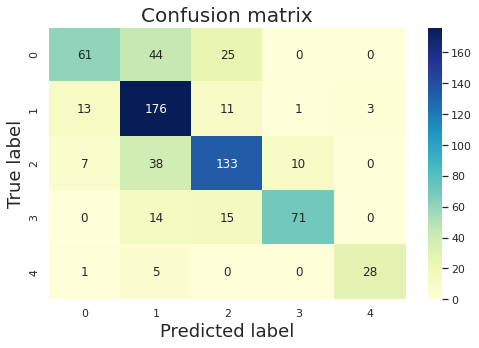

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [34]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_8/models/')
filename = "modelrf_AN_5FP_fold8_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)